In [70]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [71]:
mean = train_data.mean(axis=0)
train_data -= mean
# Standard deviation
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [72]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

In [73]:
model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

In [74]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 130
all_mae_history = []

for i in range(k):
    print(f"Processing fold #{i}")

    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)

    history = model.fit(
        partial_train_data, 
        partial_train_targets, 
        validation_data=(val_data, val_targets),
        epochs=num_epochs, 
        batch_size=16, 
        verbose=0)
    
    mae_history = history.history["val_mae"]
    all_mae_history.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [75]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
average_mae_history

[5.203249767422676,
 4.210891872644424,
 3.13312628865242,
 2.4126421213150024,
 2.0821267664432526,
 1.952183336019516,
 1.8358581811189651,
 1.7748577743768692,
 1.8488235771656036,
 1.8130737841129303,
 1.7160934954881668,
 1.8133074343204498,
 1.7336854040622711,
 1.7012668550014496,
 1.7401443123817444,
 1.6495847404003143,
 1.68707075715065,
 1.6477176249027252,
 1.6739637553691864,
 1.6366193443536758,
 1.663741558790207,
 1.6826885640621185,
 1.6790618598461151,
 1.5961618274450302,
 1.7147745788097382,
 1.6579634845256805,
 1.6635529398918152,
 1.6832008957862854,
 1.647374540567398,
 1.6396891325712204,
 1.5876356959342957,
 1.6401354372501373,
 1.7497983574867249,
 1.6465094089508057,
 1.7946162521839142,
 1.6769236028194427,
 1.6440952122211456,
 1.6584740579128265,
 1.6952930688858032,
 1.6645644903182983,
 1.6628426909446716,
 1.7247118949890137,
 1.6411188542842865,
 1.6300952732563019,
 1.7075624763965607,
 1.6899130940437317,
 1.6582306921482086,
 1.696693241596222,
 1

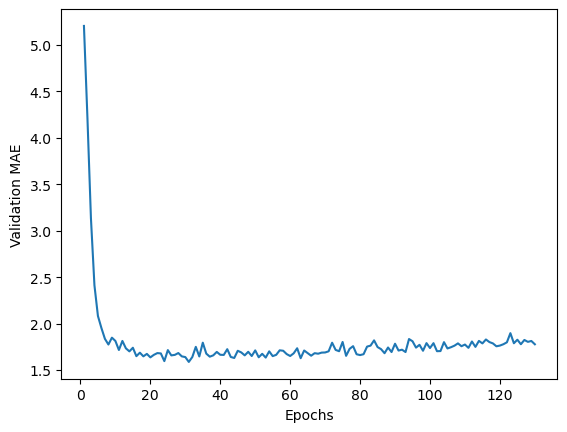

In [76]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

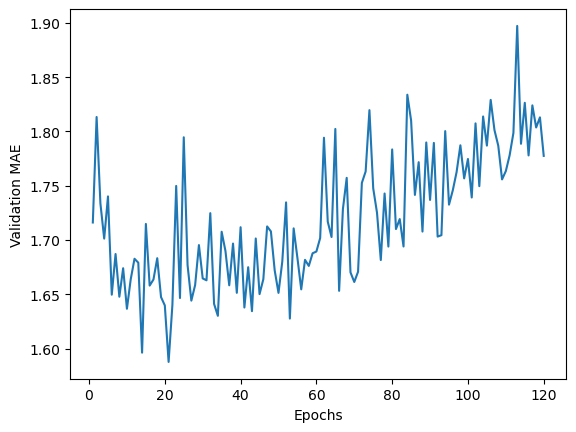

In [77]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [78]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [79]:
predictions[0]

array([10.567885], dtype=float32)